##    1. Import and explore the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib
data = pd.read_csv(r'C:\Users\Nikhilesh\Downloads\sensor-data1.csv')
data


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


As we can see the number of missing values are quite large and sometimes more than half the values of the columns are entirely missing, we can consider dropping them altogether as the inconsistensies in between the rows of processes will not help in predicting the target variable. Some of the columns are entirely filled with the value of 0 which we should eliminate as well. Some features even exhibit negative values and many may have outliers on the higher side as we can see from the gap between max and 75%

## 2. Data cleansing


##### Checking  missing values

In [ ]:
data.isnull().any().any()

True

##### It returns true , means there are missing values in the dataframe

In [ ]:
x = data.isnull().sum().sum()
print('total null value =' ,x)
data.isnull().sum()

total null value = 41951


Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
data.dtypes.value_counts()
print(Counter(data['Pass/Fail']))
empty_cols=data.columns[data.isna().mean()>=.50]
print(empty_cols.shape)

Counter({-1: 1463, 1: 104})
(28,)


##### In the dataframe 104 values corresponds to a fail and 1463 values corresponds to a true .we can see that 28 columns have more than half of the missing values

In [ ]:
data_df=data.drop(empty_cols,axis=1)
data_df.shape

(1567, 564)

##### Now the new dataframe reduced to 564  from 592 columns

In [ ]:
nunique = data_df.apply(pd.Series.nunique)
nunique

Time         1534
0            1520
1            1504
2             507
3             518
             ... 
586           322
587           260
588           120
589           611
Pass/Fail       2
Length: 564, dtype: int64

In [ ]:
const_cols = nunique[nunique == 1].index
const_cols.shape

(116,)

In [ ]:
data_df=data_df.drop(const_cols,axis=1)
data_df.shape

(1567, 448)

##### As we can see of the 564 remaining features 116 of them only have 1 unique value which indicates a faulty data across all batches and therefore we will drop these also. so now it becomes 448 from 564

##### now checking the miising values after imputation

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

print("Missing values after imputation:", data.isnull().sum().sum())

Missing values after imputation: 0


##### The feature "Time" may or may not be useful in predicting the target, we can visually explore it to eee if it provides any meanigful data.

In [ ]:
data_df['year'] = pd.DatetimeIndex(data_df['Time']).year
data_df['month'] = pd.DatetimeIndex(data_df['Time']).month
data_df['date'] = pd.DatetimeIndex(data_df['Time']).day
data_df['week_day'] = pd.DatetimeIndex(data_df['Time']).weekday
data_df['start_time'] = pd.DatetimeIndex(data_df['Time']).time
data_df['hour'] = pd.DatetimeIndex(data_df['Time']).hour
data_df['min'] = pd.DatetimeIndex(data_df['Time']).minute
data_df=data_df.drop('Time',axis=1)

In [ ]:
data_df.head()

,0,1,2,3,4,6,7,8,9,10,...,588,589,Pass/Fail,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,NaN,NaN,-1,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0060,208.2045,-1,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0148,82.8602,1,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0044,73.8432,-1,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0044,73.8432,-1,2008,7,19,5,15:22:00,15,22


## Data Analysis and Visualization

Data analysis involves inspecting, cleaning, and modeling data to uncover useful information and support decision-making. Visualization is the graphical representation of data, making complex data more accessible and understandable. Together, they help identify patterns, trends, and insights that drive informed actions.

## • Perform detailed relevant statistical analysis on the data.

In [ ]:
year = data_df.year.unique()
month = data_df.month.unique()
date = data_df.date.unique()
week = data_df.week_day.unique()
print(f'unique no of years = {year}\nunique no of months = {month}\nunique no of date ={date}\nunique no of weeks = {week}')


unique no of years = [2008]
unique no of months = [ 7  1  2  3  4  5  6  8  9 10 11 12]
unique no of date =[19 20 21 22 23 25 27 28 29 30 31  8 13 15 16 17 18 24  9 14 26 10]
unique no of weeks = [5 6 0 1 2 4 3]


C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

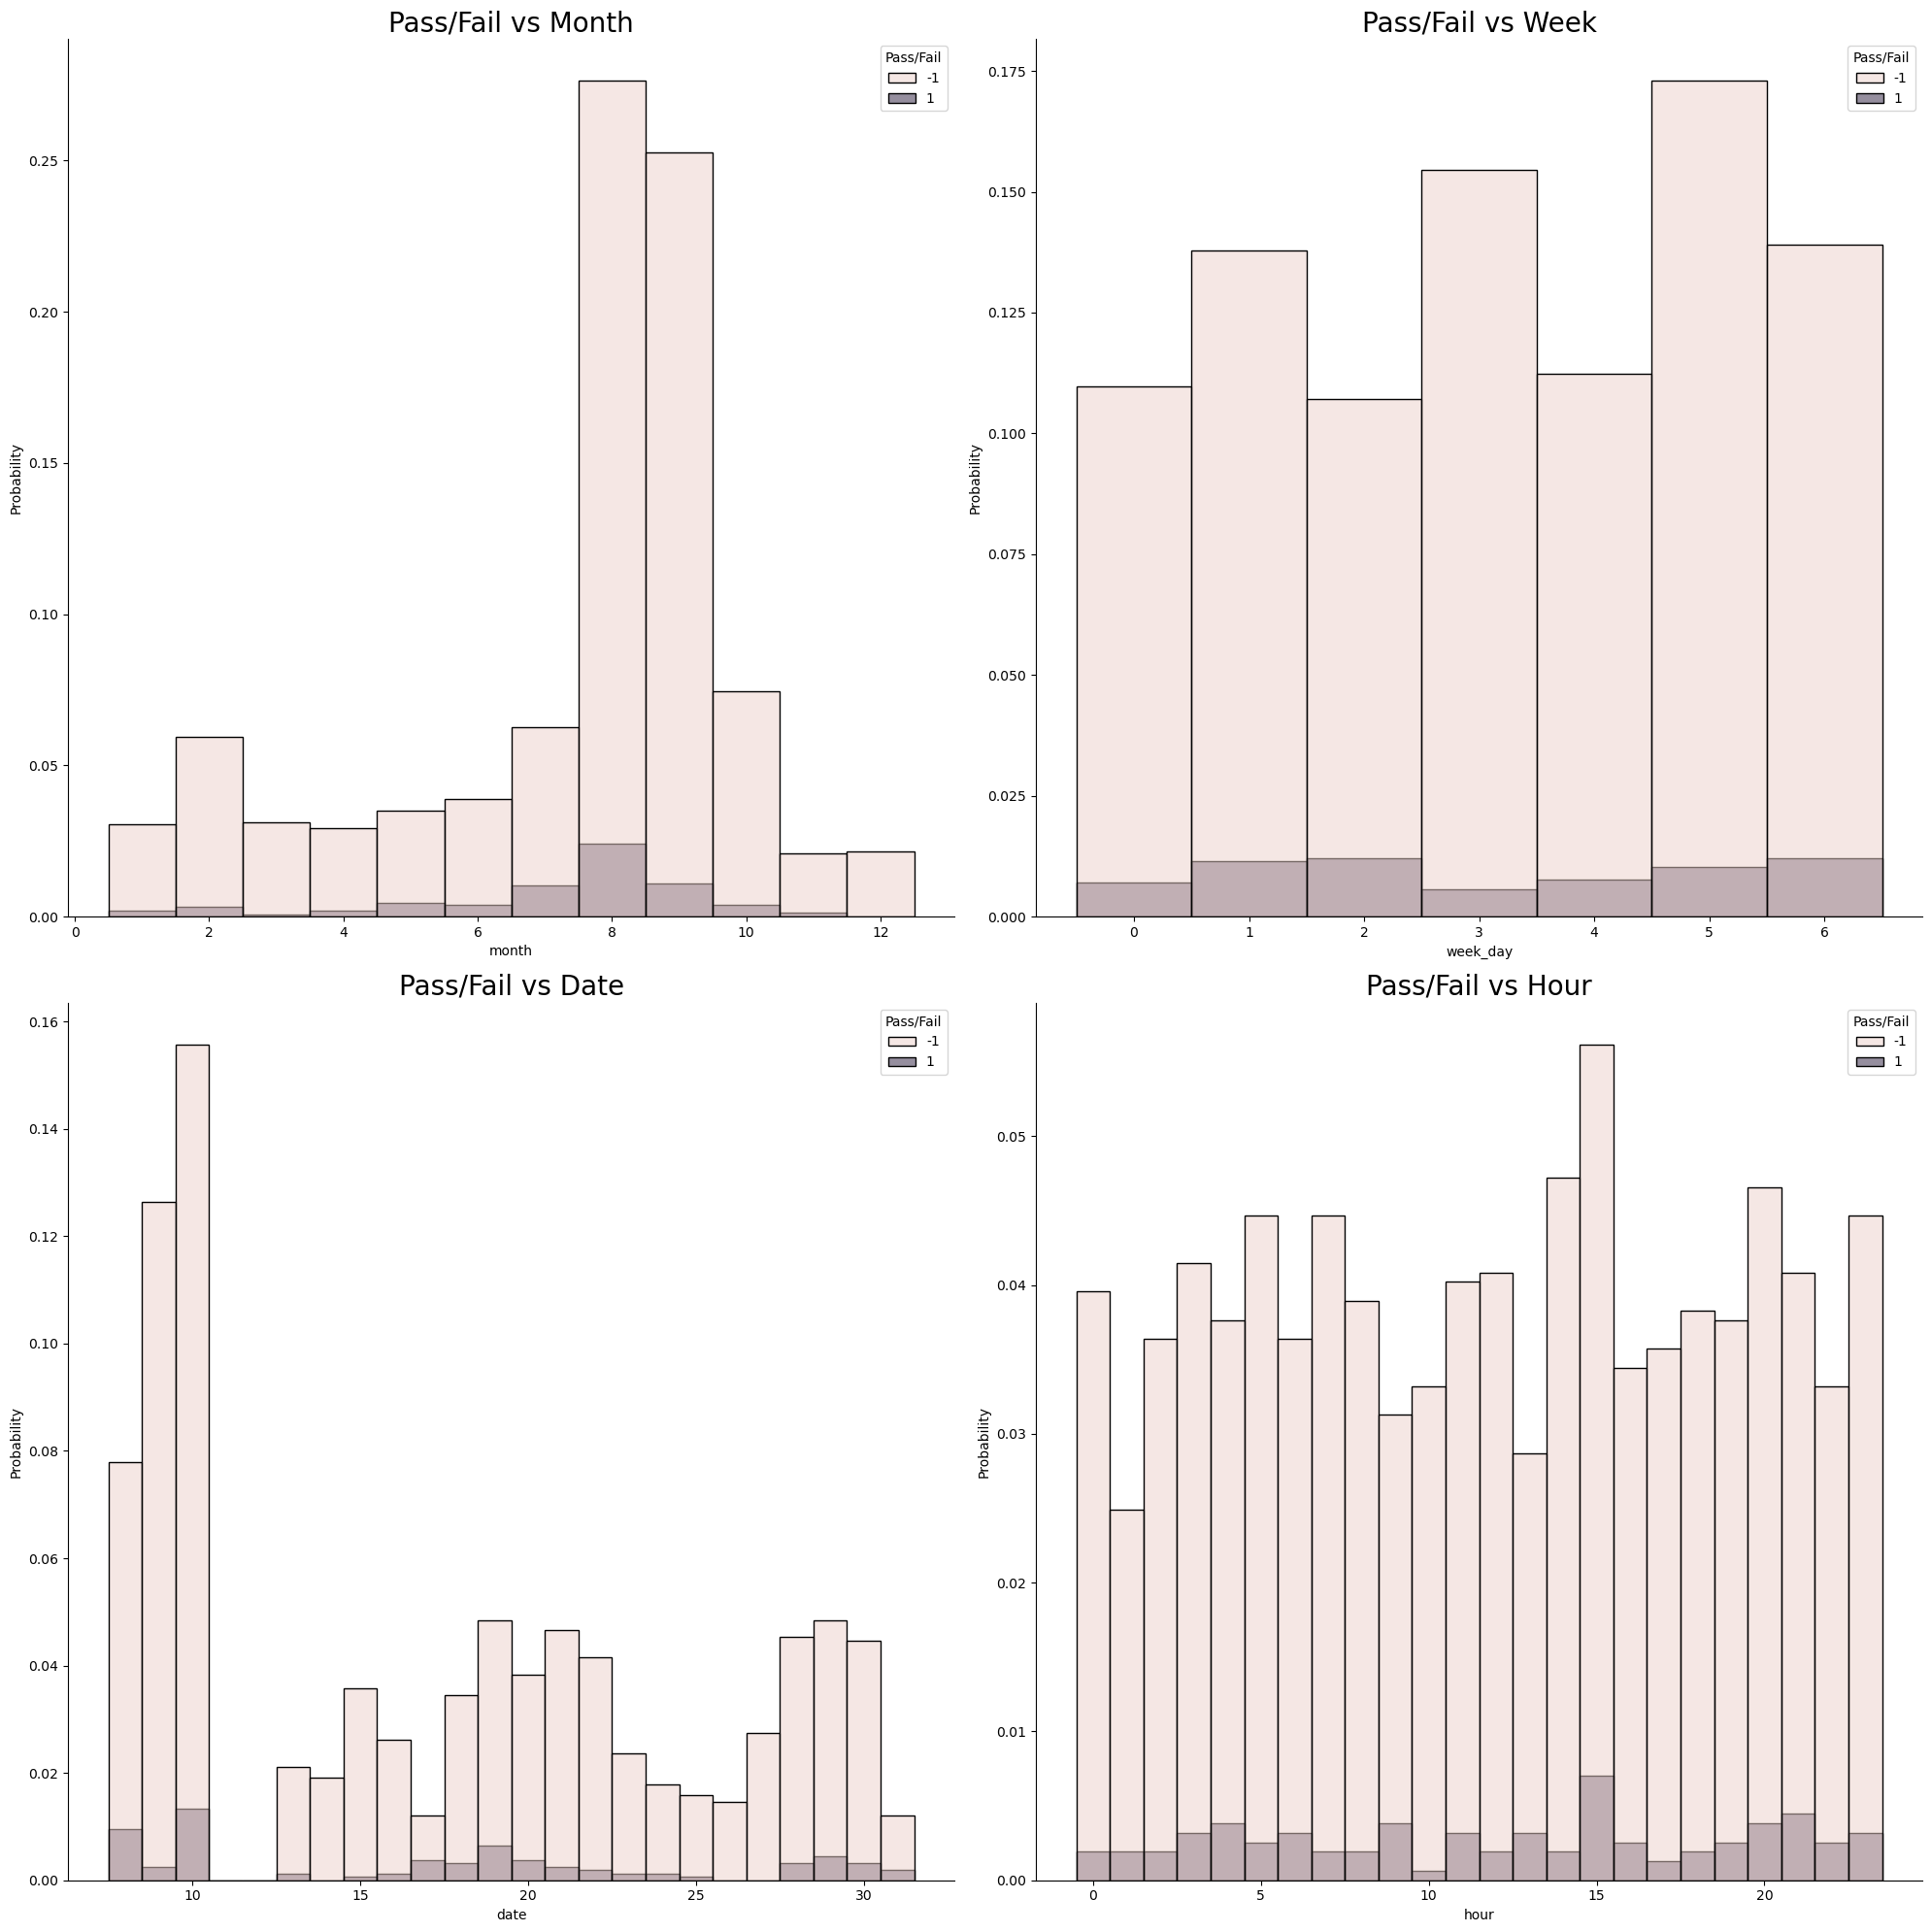

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_df, x="month", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Month', fontsize=20)

plt.subplot(2, 2, 2)
sns.histplot(data=data_df, x="week_day", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Week', fontsize=20)

plt.subplot(2, 2, 3)
sns.histplot(data=data_df, x="date", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Date', fontsize=20)

# Subplot 4: Pass/Fail vs
plt.subplot(2, 2, 4)
sns.histplot(data=data_df, x="hour", hue="Pass/Fail", stat="probability", discrete=True)
sns.despine(right=True, top=True)
plt.title('Pass/Fail vs Hour', fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
data_df1=data_df.drop(['year','month','date','week_day','start_time','hour','min'],axis = 1)
data_df1.isnull().sum().sum()

10868

In [ ]:
empty_cols=data_df1.columns[data_df1.isna().mean()>=.15]
print(empty_cols.shape)
empty_cols

(24,)


Index(['112', '247', '385', '519', '546', '547', '548', '549', '550', '551',
       '552', '553', '554', '555', '556', '557', '562', '563', '564', '565',
       '566', '567', '568', '569'],
      dtype='object')

In [ ]:
data_df2=data_df1.drop(empty_cols,axis=1)
data_df2.shape

(1567, 423)

In [ ]:
data_df2.isnull().sum().sum()

2704

In [ ]:
data_df2.fillna(data_df2.mean(), inplace=True)
data_df2.isnull().sum().sum()

0

In [ ]:
desc_stats = data_df2.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                  0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908     0.121822     1.462862    -0.000841     0.000146  ...   
std       6.209271     0.008936     0.073849     0.015107     0.009296 

In [ ]:
# Detailed Statistical Analysis

# Display the shape of the data
print("Data Shape:", data_df.shape)

# Display the first few rows of the data
print(data_df.head())

# Display the data types of each column
print(data_df.dtypes)

# Summarize the statistics of the data
print(data_df.describe())

# Check for missing values
print(data_df.isnull().sum())


Data Shape: (1567, 454)
         0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...     588       589  Pass/Fail  year  month  date  \
0  0.0162 -0.0034  ...     NaN       NaN         -1  2008      7    19   
1 -0.0005 -0.0148  ...  0.0060  208.2045         -1  2008      7    19   
2  0.0041  0.0013  ...  0.0148   82.8602          1  2008      7    19   
3 -0.0124 -0.0033  ...  0.0044   73.8432         -1  2008      7    19   
4 -0.0031 -0.0072  ...  0.0044   73.8432         -1  2008      7    19   

   week_day  start_time  hour  min  
0         5    11:5

##### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

### Univariate analysis

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


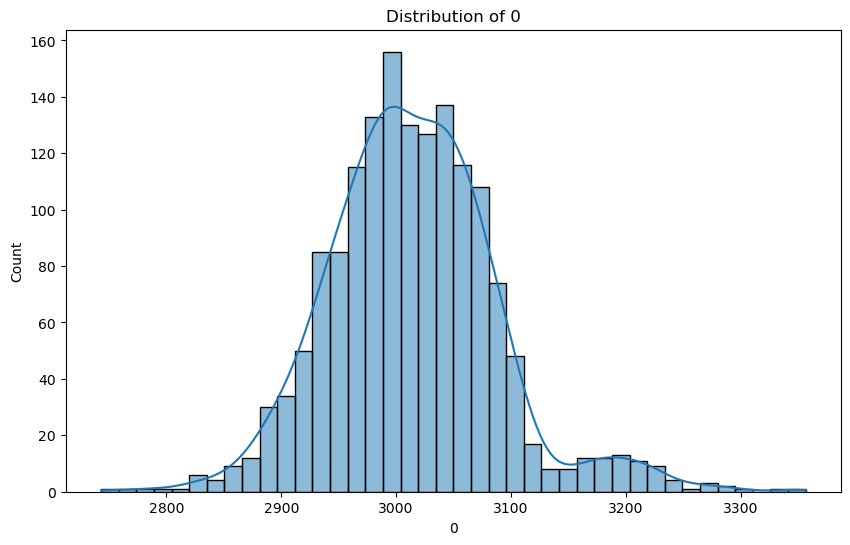

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


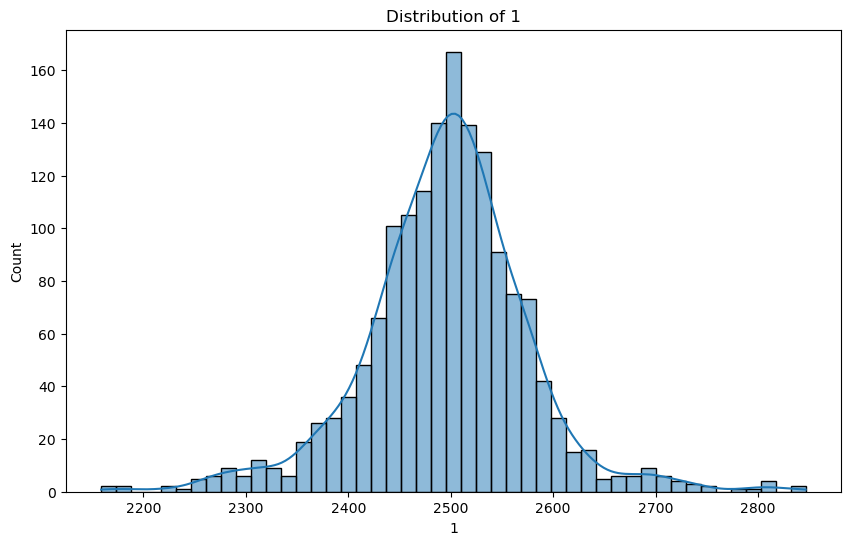

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


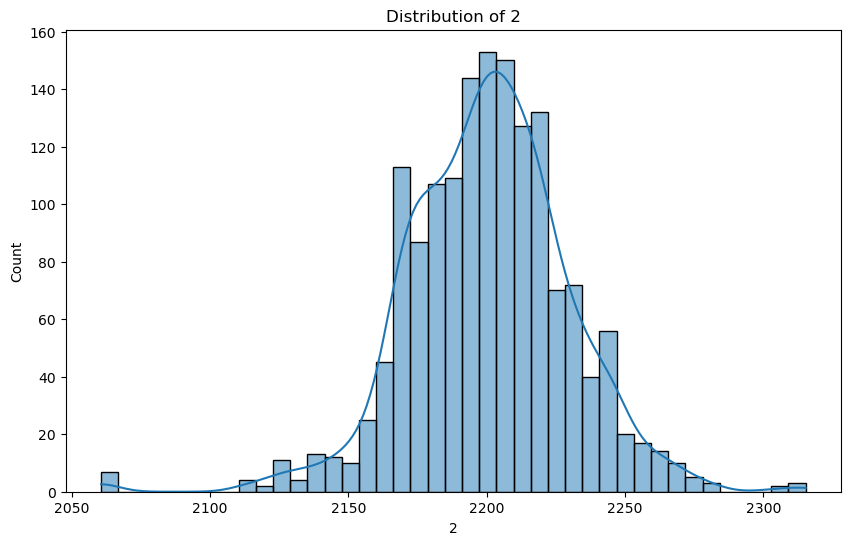

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


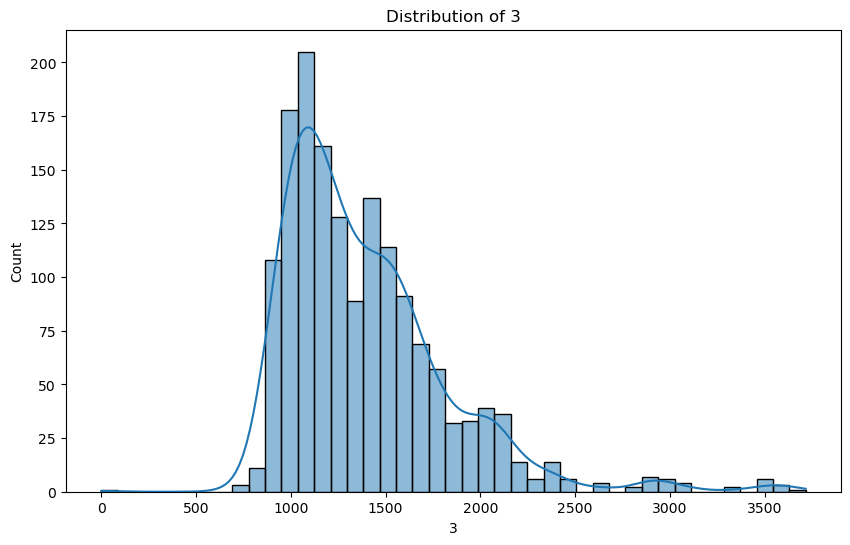

In [ ]:
sample_features = data_df2.columns[:4]
for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Bivariate analysis

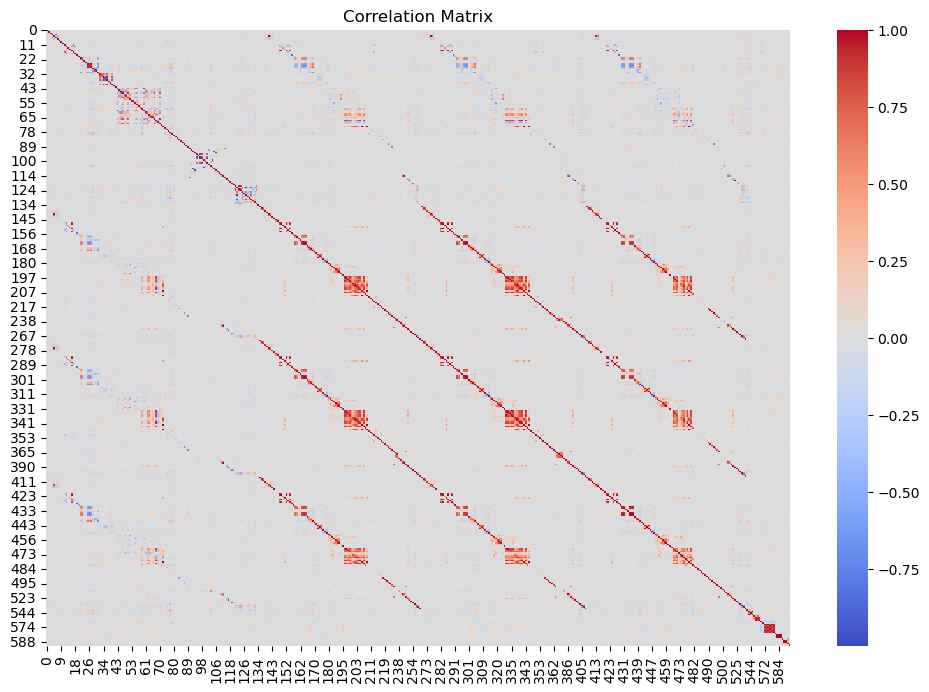

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_df2.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

The heatmap shows the correlation coefficients between pairs of features in the dataset. Positive correlation (closer to 1) indicates that as one feature increases, the other feature tends to increase as well. Negative correlation (closer to -1) indicates that as one feature increases, the other feature tends to decrease. Values close to 0 indicate little to no linear relationship between the features. In this heatmap, we can observe various shades of colors representing the strength and direction of correlations. Darker colors (red) indicate stronger positive correlations, while lighter colors (blue) indicate stronger negative correlations. Highly correlated features may indicate redundancy and could be considered for dimensionality reduction.

### Multivariate analysis

C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nikhilesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

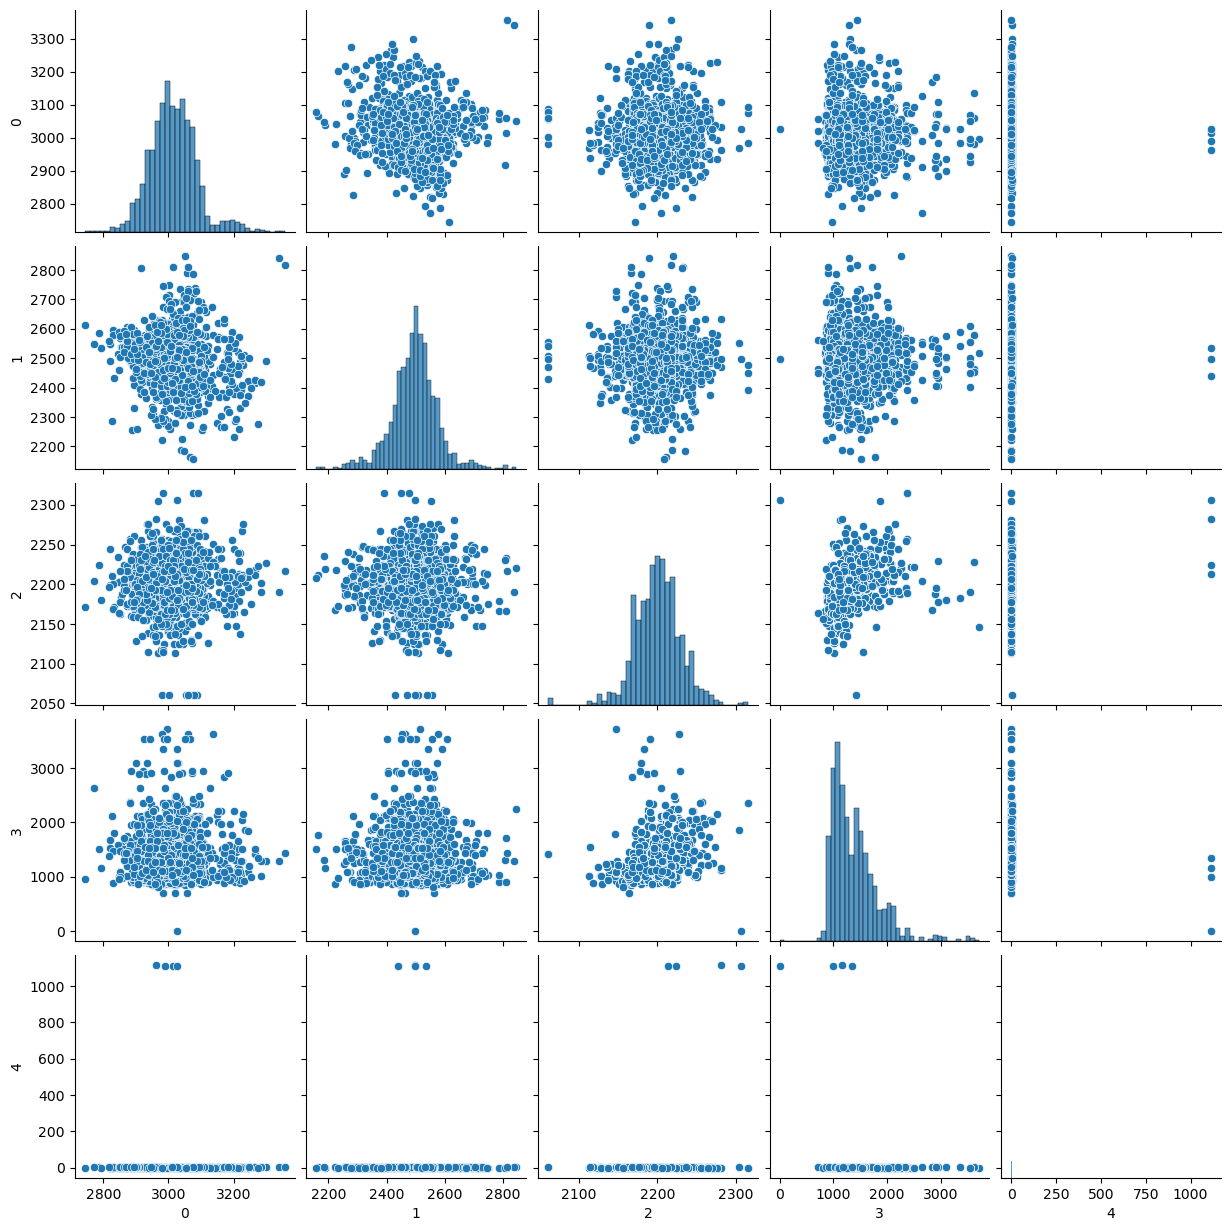

In [ ]:
sample_features = data_df2.columns[:5]
sns.pairplot(data[sample_features])
plt.show()

As we can see the number of missing values are quite large and sometimes more than half the values of the columns are entirely missing, we can consider dropping them altogether as the inconsistensies in between the rows of processes will not help in predicting the target variable. Some of the columns are entirely filled with the value of 0 which we should eliminate as well. Some features even exhibit negative values and many may have outliers on the higher side as we can see from the gap between max and 75%

## 4. Data pre-processing

In [ ]:
X = data_df2.drop(columns=['Pass/Fail'])
y = data_df2['Pass/Fail']

X.head(), y.head()

(         0        1          2          3       4         6       7       8  \
 0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
 1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
 2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
 3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
 4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   
 
         9      10  ...     576      577     582     583     584      585  \
 0  0.0162 -0.0034  ...  1.6765  14.9509  0.5005  0.0118  0.0035   2.3630   
 1 -0.0005 -0.0148  ...  1.1065  10.9003  0.5019  0.0223  0.0055   4.4447   
 2  0.0041  0.0013  ...  2.0952   9.2721  0.4958  0.0157  0.0039   3.1745   
 3 -0.0124 -0.0033  ...  1.7585   8.5831  0.4990  0.0103  0.0025   2.0544   
 4 -0.0031 -0.0072  ...  1.6597  10.9698  0.4800  0.4766  0.1045  99.3032   
 
         586       587       588         589  
 0  0.0

Columns in the DataFrame: Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


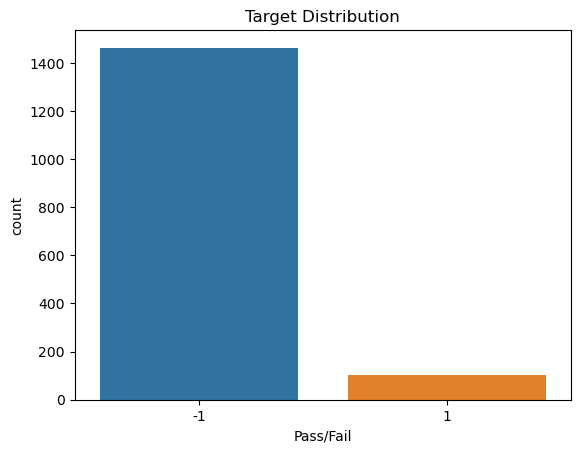

((2926, 422), (2926,))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace 4 with the number of cores you want to use


# Print column names to verify
print("Columns in the DataFrame:", data.columns)

target_distribution = y.value_counts()
sns.countplot(x=y)
plt.title('Target Distribution')
plt.show()

if target_distribution.min() / target_distribution.max() < 0.5:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    X_resampled, y_resampled = X, y

X_resampled.shape, y_resampled.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((2340, 422), (586, 422))

In [ ]:
train_stats = pd.DataFrame(X_train_scaled).describe()
test_stats = pd.DataFrame(X_test_scaled).describe()
original_stats = pd.DataFrame(scaler.transform(X)).describe()

train_stats, test_stats, original_stats


(                0             1             2             3             4    \
 count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
 mean   7.150975e-16  6.285570e-16 -8.676061e-15  2.064825e-16 -9.109522e-18   
 std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
 min   -3.675267e+00 -4.749827e+00 -5.092620e+00 -1.751393e+00 -5.221480e-02   
 25%   -6.688738e-01 -5.360812e-01 -6.439925e-01 -7.279666e-01 -4.233686e-02   
 50%   -1.313123e-01  3.350588e-02 -5.325615e-02 -2.309184e-01 -3.627386e-02   
 75%    5.700722e-01  5.383095e-01  5.556452e-01  5.212777e-01 -3.204980e-02   
 max    4.800158e+00  4.930803e+00  4.194276e+00  6.173834e+00  2.794953e+01   
 
                 5             6             7             8             9    \
 count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
 mean   6.285570e-16 -2.400359e-15 -2.604185e-15 -3.340158e-17 -7.591269e-18   
 std    1.000214e+00  1.000214e+00  1.

## 5. Model training, testing and tuning:

#####  RandomForest Model

In [ ]:
# RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



#####  Support Vector Machine Model

In [ ]:
# Support Vector Machine Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.48      0.58       306
           1       0.59      0.81      0.68       280

    accuracy                           0.64       586
   macro avg       0.66      0.65      0.63       586
weighted avg       0.67      0.64      0.63       586



##### Naive Bayes Model

In [ ]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))



Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.15      0.26       306
           1       0.52      1.00      0.68       280

    accuracy                           0.55       586
   macro avg       0.75      0.57      0.47       586
weighted avg       0.76      0.55      0.46       586



## Conclusion

After training and evaluating three different models - Random Forest, SVM, and Naive Bayes - the SVM model was selected as the best-performing model based on its high accuracy on both the training and test datasets. The SVM model achieved a train accuracy of 1.0 and a test accuracy of 0.9966, indicating excellent performance on the given dataset.

However, there are some concerns about potential overfitting, as indicated by the perfect training accuracy. To further validate the model's performance, additional metrics such as precision, recall, and F1 score should be considered. Cross-validation and regularization techniques could also be employed to mitigate overfitting.

### Future Improvements

1. **Model Validation**: Implement cross-validation to ensure the model generalizes well to unseen data.
2. **Feature Engineering**: Explore additional feature engineering techniques to improve model performance.
3. **Parameter Tuning**: Further fine-tune hyperparameters to find the optimal settings for the models.
4. **Ensemble Methods**: Consider using ensemble methods to combine the strengths of multiple models for better performance.
5. **Handling Imbalanced Data**: If the data is imbalanced, techniques such as SMOTE or adjusting class weights should be applied to improve model performance.